# Problem 17
Consider an AR process u(n) defined by the difference equation
u1n2 = -a1u1n - 12 - a2u1n - 22 + n1n2,

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import padasip as pa 

In [10]:
a1 = 0.1
a2 = -0.8

NoiseVariance = ((1*((1+a2)**2 - a1**2))/((1+a2)/(1-a2))) # based on equation 1.88

print('The calculated noise variance for signal u(n) of unit variance: {}'.format(round(NoiseVariance,3)), '\n')

The calculated noise variance for signal u(n) of unit variance: 0.27 



In [14]:
NoiseStandardDeviation = np.sqrt(NoiseVariance)

size = 1000 #number of runs
noise = np.random.normal(0, NoiseStandardDeviation, size)

u = np.zeros((size, 1))
for n in range(0, size):
    u[n] = -a1*u[n-1]-a2*u[n-2] + noise[n]

Correlation_matrix = np.matmul(u, np.transpose(u))
eigenvals = np.linalg.eigvals(Correlation_matrix)

print('Limit for mu, calculated from eigenvalues: {}'.format(2/np.max(eigenvals)))
print('Limit for mu, calculated from max values of the Correlation matrix: {}'.format(2/np.max(Correlation_matrix)))

Limit for mu, calculated from eigenvalues: (0.0020474937109632454+0j)
Limit for mu, calculated from max values of the Correlation matrix: 0.16038874703899564


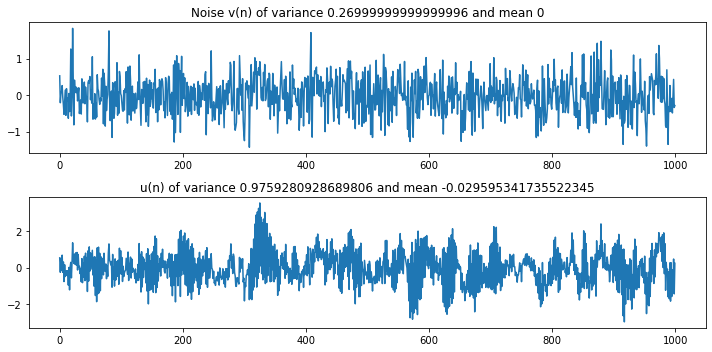

In [16]:
plt.figure(figsize=(10,5))
plt.subplot(211)
plt.plot(noise)
plt.title('Noise v(n) of variance '+format(NoiseStandardDeviation**2)+' and mean 0')
plt.subplot(212)
plt.plot(u)
plt.title('u(n) of variance '+format(np.std(u)**2)+' and mean '+format(np.mean(u)))
plt.tight_layout()
plt.show()

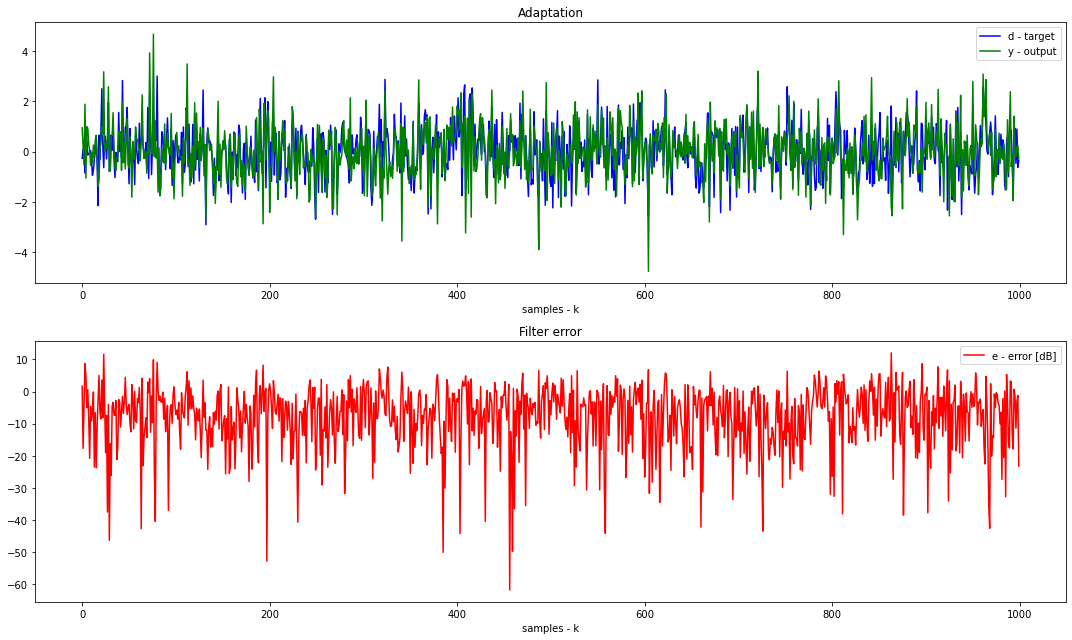

In [30]:
## PART B

# creation of data
matrix = np.random.normal(0, 1, (size, 4)) # input matrix
d = - a1*matrix[:,1] - a2*matrix[:,2] + noise # target

# identification
filters = pa.filters.FilterRLS(n=4, mu=0.05, w="random")
y, e, w = filters.run(d, matrix)

# show results
plt.figure(figsize=(15,9))
plt.subplot(211);plt.title("Adaptation");plt.xlabel("samples - k")
plt.plot(d,"b", label="d - target")
plt.plot(y,"g", label="y - output");plt.legend()
plt.subplot(212);plt.title("Filter error");plt.xlabel("samples - k")
plt.plot(10*np.log10(e**2),"r", label="e - error [dB]");plt.legend()
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'E2')

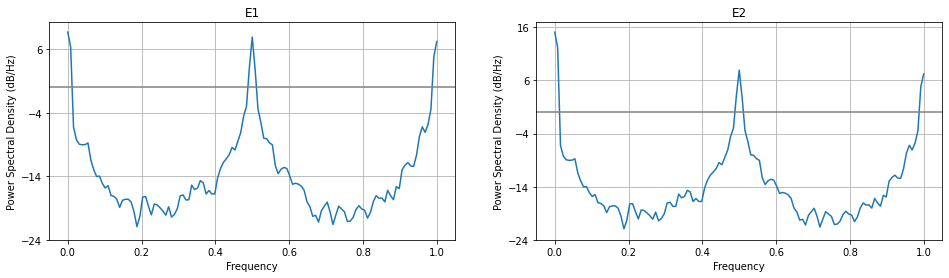

In [27]:
#Part C
equ1 = -a1-w
equ2 = -a2-w

fig2 = plt.figure(figsize=(16,4))
ax1 = fig2.add_subplot(1,2,1)
ax1.psd(equ1.flatten())
ax1.axhline(0, color='gray')
ax1.set_title('E1')

ax2 = fig2.add_subplot(1,2,2)
ax2.psd(equ2.flatten())
ax2.axhline(0, color='gray')
ax2.set_title('E2')

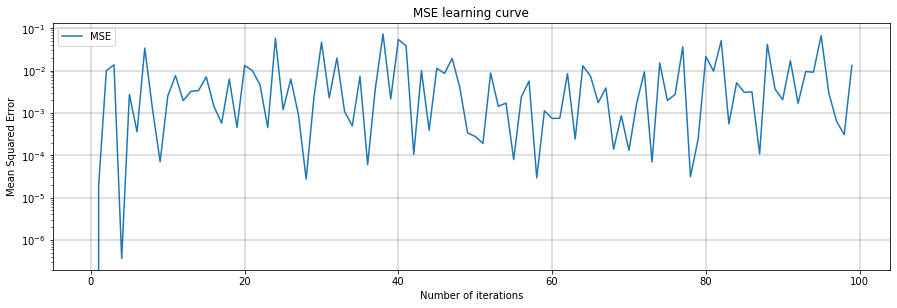

In [29]:
#Part D
numberOfRuns = 100
MSE = np.zeros((numberOfRuns, 1)) # allocate memory for sum of squared errors
    
for n in range(1, numberOfRuns):  # do filter and weight updates
    filters= pa.filters.FilterRLS(n=4, mu=0.05, w="random")
    y, e, w = filters.run(d, matrix)

    MSE[n] = MSE[n] + y[n]**2      # accumulate squared estimation errors

MSE = MSE/numberOfRuns # Calculate average MSE over all simulations

# Plot MSE and J over time
fig = plt.figure(figsize=(15,10))
bx = fig.add_subplot(2,1,2)   
bx.semilogy(range(0,numberOfRuns), MSE, label='MSE') 
bx.set_title('MSE learning curve')
bx.set_xlabel('Number of iterations')    
bx.set_ylabel('Mean Squared Error')      
bx.grid(color='black', linestyle='-', linewidth=0.25)
bx.axhline(0, color='gray')
plt.legend(loc='upper left')